# Tutorial on IMDB dataset

In [4]:
import pandas as pd

In [22]:
#load in the IMDB movies dataset
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

In [23]:
#Viewing your data
movies_df.head()
movies_df.head(10)
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [24]:
#Getting info about your data
movies_df.info()
movies_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


(1000, 11)

In [25]:
#Handling duplicates
temp_df = pd.concat([movies_df, movies_df])
temp_df.shape
temp_df = temp_df.drop_duplicates()
temp_df.shape

temp_df.drop_duplicates(inplace=True)

In [26]:
#Handling duplicates
temp_df = pd.concat([movies_df, movies_df])
temp_df.drop_duplicates(inplace=True, keep=False)
temp_df.shape

(0, 11)

In [27]:
#Column cleanup
movies_df.columns
movies_df.rename(columns={
'Runtime (Minutes)': 'Runtime',
'Revenue (Millions)': 'Revenue_millions' }, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [28]:
#Column cleanup
movies_df.columns = ['rank', 'genre', 'description', 'director','actors', 'year', 'runtime','rating', 'votes','revenue_millions','metascore']

In [30]:
#a list comprehension
movies_df.columns = [col.upper() for col in movies_df]
movies_df.columns = [col.lower() for col in movies_df]

In [32]:
#How to work with missing values
movies_df.isnull()
movies_df.isnull().sum()

,0
rank,0
genre,0
description,0
director,0
actors,0
year,0
runtime,0
rating,0
votes,0
revenue_millions,128


In [33]:
#Removing null values
movies_df.dropna()
movies_df.dropna(axis=1) #drop columns

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In [34]:
#Imputation
revenue = movies_df['revenue_millions']
revenue.head()
revenue_mean = revenue.mean()
revenue.fillna(revenue_mean, inplace=True)

In [35]:
movies_df.isnull().sum()

,0
rank,0
genre,0
description,0
director,0
actors,0
year,0
runtime,0
rating,0
votes,0
revenue_millions,0


In [36]:
#Understanding your variables
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [37]:
movies_df['genre'].describe()

,genre
count,1000
unique,207
top,"Action,Adventure,Sci-Fi"
freq,50


In [38]:
#Understanding your variables the frequency of all values in a column
movies_df['genre'].value_counts().head(10)

,count
genre,
"Action,Adventure,Sci-Fi",50
Drama,48
"Comedy,Drama,Romance",35
Comedy,32
"Drama,Romance",31
"Animation,Adventure,Comedy",27
"Action,Adventure,Fantasy",27
"Comedy,Drama",27
"Comedy,Romance",26


In [40]:
movies_df = movies_df.select_dtypes(include=['float64', 'int64'])
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


In [48]:
# Step 1: Print all column names to check for 'genre'
print(movies_df.columns)

# Step 2: If the correct column is found, access it
genre_col = movies_df.get('genre')

if genre_col is not None:
    print(type(genre_col))  # Check the type
else:
    print("'genre' column not found in DataFrame")


Index(['rank', 'year', 'runtime', 'rating', 'votes', 'revenue_millions',
       'metascore'],
      dtype='object')
'genre' column not found in DataFrame


In [54]:
#DataFrame slicing, selecting, extracting
subset = movies_df[['rating', 'runtime']]  # Example of using 'rating' and 'runtime'
print(subset.head())


                         rating  runtime
Title                                   
Guardians of the Galaxy     8.1      121
Prometheus                  7.0      124
Split                       7.3      117
Sing                        7.2      108
Suicide Squad               6.2      123


In [55]:
#DataFrame slicing, selecting, extracting By rows
prom = movies_df.loc["Prometheus"]
prom = movies_df.iloc[1]

In [57]:
#DataFrame slicing, selecting, extracting
prom = movies_df.loc["Prometheus"]

In [58]:
movie_subset = movies_df.loc['Prometheus':'Sing']
movie_subset = movies_df.iloc[1:4]
movie_subset

,rank,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,
Prometheus,2,2012,124,7.0,485820,126.46,65.0
Split,3,2016,117,7.3,157606,138.12,62.0
Sing,4,2016,108,7.2,60545,270.32,59.0


In [60]:
# Step 1: Print all column names to verify
print(movies_df.columns)

# Step 2: Apply condition only if 'director' column exists
if 'director' in movies_df.columns:
    condition = movies_df[movies_df['director'] == "Ridley Scott"]
    print(condition.head())
else:
    print("'director' column not found in DataFrame")


Index(['rank', 'year', 'runtime', 'rating', 'votes', 'revenue_millions',
       'metascore'],
      dtype='object')
'director' column not found in DataFrame


In [62]:
movies_df[movies_df['rating'] >= 8.6].head(3)

,rank,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,
Interstellar,37,2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,2008,152,9.0,1791916,533.32,82.0
Inception,81,2010,148,8.8,1583625,292.57,74.0


In [66]:
print(movies_df.head())  # View the top rows of the DataFrame to see available data


                         rank  year  runtime  rating   votes  \
Title                                                          
Guardians of the Galaxy     1  2014      121     8.1  757074   
Prometheus                  2  2012      124     7.0  485820   
Split                       3  2016      117     7.3  157606   
Sing                        4  2016      108     7.2   60545   
Suicide Squad               5  2016      123     6.2  393727   

                         revenue_millions  metascore  
Title                                                 
Guardians of the Galaxy            333.13       76.0  
Prometheus                         126.46       65.0  
Split                              138.12       62.0  
Sing                               270.32       59.0  
Suicide Squad                      325.02       40.0  


In [68]:
movies_df[
((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
& (movies_df['rating'] > 8.0)
& (movies_df['revenue_millions'] <
movies_df['revenue_millions'].quantile(0.25)) ]

,rank,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,
3 Idiots,431,2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,2006,137,8.5,278103,11.28,89.0
Incendies,714,2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,2007,165,8.5,102697,1.20,42.0


In [72]:
# Applying functions
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

,rank,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,
Guardians of the Galaxy,1,2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,2012,124,7.0,485820,126.46,65.0,bad


<Axes: title={'center': 'revenue_millions'}, xlabel='rating_category'>

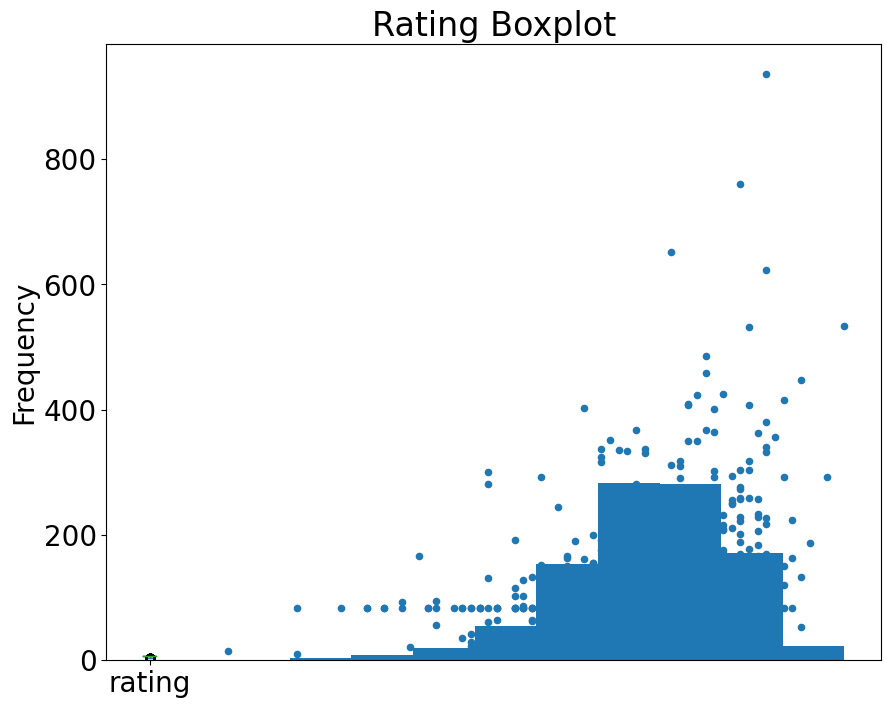

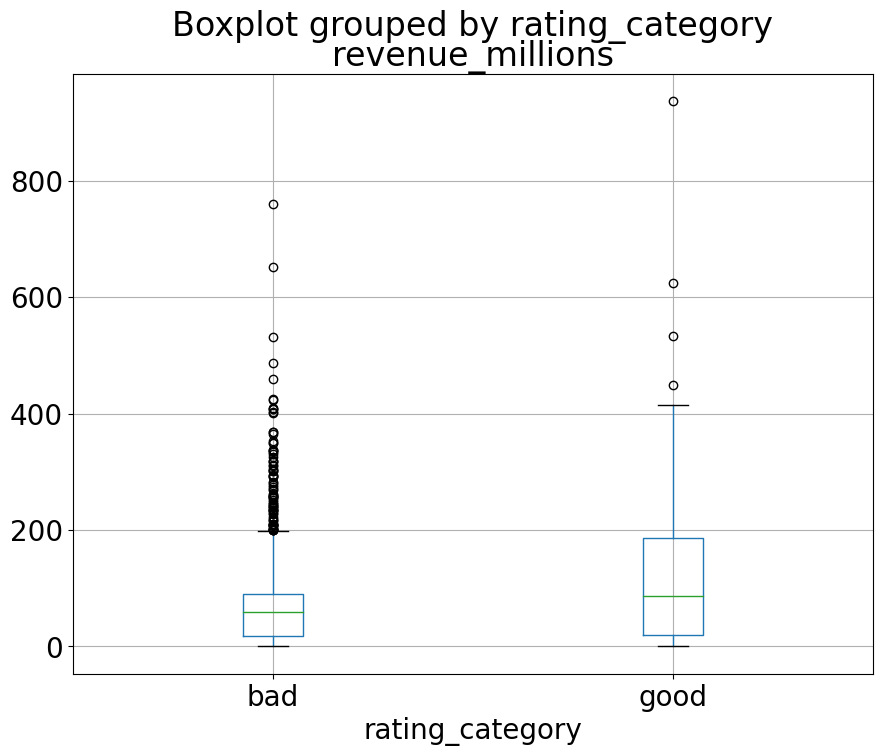

In [74]:
import matplotlib.pyplot as plt

# Set font size and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

# Create plots
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating')
movies_df['rating'].plot(kind='hist', title='Rating Distribution')
movies_df['rating'].plot(kind='box', title='Rating Boxplot')

# Boxplot grouped by 'rating_category'
movies_df.boxplot(column='revenue_millions', by='rating_category')